In [2]:
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import json
import numpy as np

from plot_utils import utils as plot_utils
from models import utils as model_utils

2024-01-19 11:48:54.575527: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 11:48:54.575550: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 11:48:54.575570: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 11:48:54.579569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 11:48:55.067238: W tensorflow/compiler/

## Load Data

In [2]:
WINDOW_SIZE = 60
TRAIN = 'train'
TEST = 'test'
# RAW DATA
raw_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
raw_train_df.index = pd.to_datetime(raw_train_df.index)
raw_train_X = model_utils.get_X(raw_train_df, WINDOW_SIZE)
raw_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/raw/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
raw_test_df.index = pd.to_datetime(raw_test_df.index)
raw_test_X = model_utils.get_X(raw_test_df, WINDOW_SIZE)
# FEATURED DATA
feat_train_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/train_1m_2010-10-11_2012-11-06.csv", index_col=0)
feat_train_df.index = pd.to_datetime(feat_train_df.index)
feat_train_X = model_utils.get_X(feat_train_df, WINDOW_SIZE)
feat_test_df = pd.read_csv("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/data/feat/test_1m_2012-11-07_2012-11-20.csv", index_col=0)
feat_test_df.index = pd.to_datetime(feat_test_df.index)
feat_test_X = model_utils.get_X(feat_test_df, WINDOW_SIZE)
# LABELS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    labels_train_dict = pickle.load(file)
Y_train_dict = {}
for label_name in labels_train_dict.keys():
    Y_train_dict[label_name] = model_utils.get_Y_or_W(labels_train_dict[label_name], WINDOW_SIZE)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/labels/all_labels_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    labels_test_dict = pickle.load(file)
Y_test_dict = {}
for label_name in labels_test_dict.keys():
    Y_test_dict[label_name] = model_utils.get_Y_or_W(labels_test_dict[label_name], WINDOW_SIZE)
# WEIGHTS
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_train_1m_2010-10-11_2012-11-06.pkl", 'rb') as file:
    weights_train_dict = pickle.load(file)
with open("/home/mdzaja/MasterThesis/artifacts/assets/AAPL/weights/all_weights_test_1m_2012-11-07_2012-11-20.pkl", 'rb') as file:
    weights_test_dict = pickle.load(file)

## Data Presentation

In [3]:
def print_data_info(data_df):
    print(f'\tShape: {data_df.shape}')
    start_date = data_df.index[0].strftime('%Y-%m-%d %H:%M:%S')
    end_date = data_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')
    print(f'\tDates from {start_date} to {end_date}')

print('RAW DATA')
print(f'\tColumns:\n\t{", ".join(raw_train_df.columns.tolist())}')

print('Raw TRAIN data')
print_data_info(raw_train_df)

print(f'Raw TEST data')
print_data_info(raw_test_df)

print('=====================================================================================================')

print('FEATURED DATA')
print(f'\tColumns:\n\t{", ".join(feat_train_df.columns.tolist())}')

print('Featured TRAIN data')
print_data_info(feat_train_df)

print(f'Featured TEST data')
print_data_info(feat_test_df)

RAW DATA
	Columns:
	Open, High, Low, Close, Volume
Raw TRAIN data
	Shape: (297204, 5)
	Dates from 2018-06-19 10:53:00 to 2021-07-01 13:55:00
Raw TEST data
	Shape: (49533, 5)
	Dates from 2021-07-01 13:58:00 to 2021-12-31 15:59:00
FEATURED DATA
	Columns:
	Open, High, Low, Close, Volume, Returns, Volatility, Max_Drawdown, Max_Drawup, Volume_Change, Returns.1, Volatility.1, Max_Drawdown.1, Max_Drawup.1, Volume_Change.1, ADX, APO, CCI, DX, MFI, RSI, ULTOSC, WILLR, NATR, Alpha, Beta, Index_Returns, Index_Volatility, Correlation, Covariance, Beta_Direct, TF_Max_Drawdown, TF_Max_Drawup, Return_Skewness, Return_Kurtosis, Asset_To_Index_Alpha, Asset_To_Index_Beta, sin_Day_of_Week, cos_Day_of_Week, sin_Day_of_Month, cos_Day_of_Month, sin_Day_of_Year, cos_Day_of_Year, sin_time_of_day, cos_time_of_day
Featured TRAIN data
	Shape: (297204, 45)
	Dates from 2018-06-19 10:53:00 to 2021-07-01 13:55:00
Featured TEST data
	Shape: (49533, 45)
	Dates from 2021-07-01 13:58:00 to 2021-12-31 15:59:00


## Label Plots

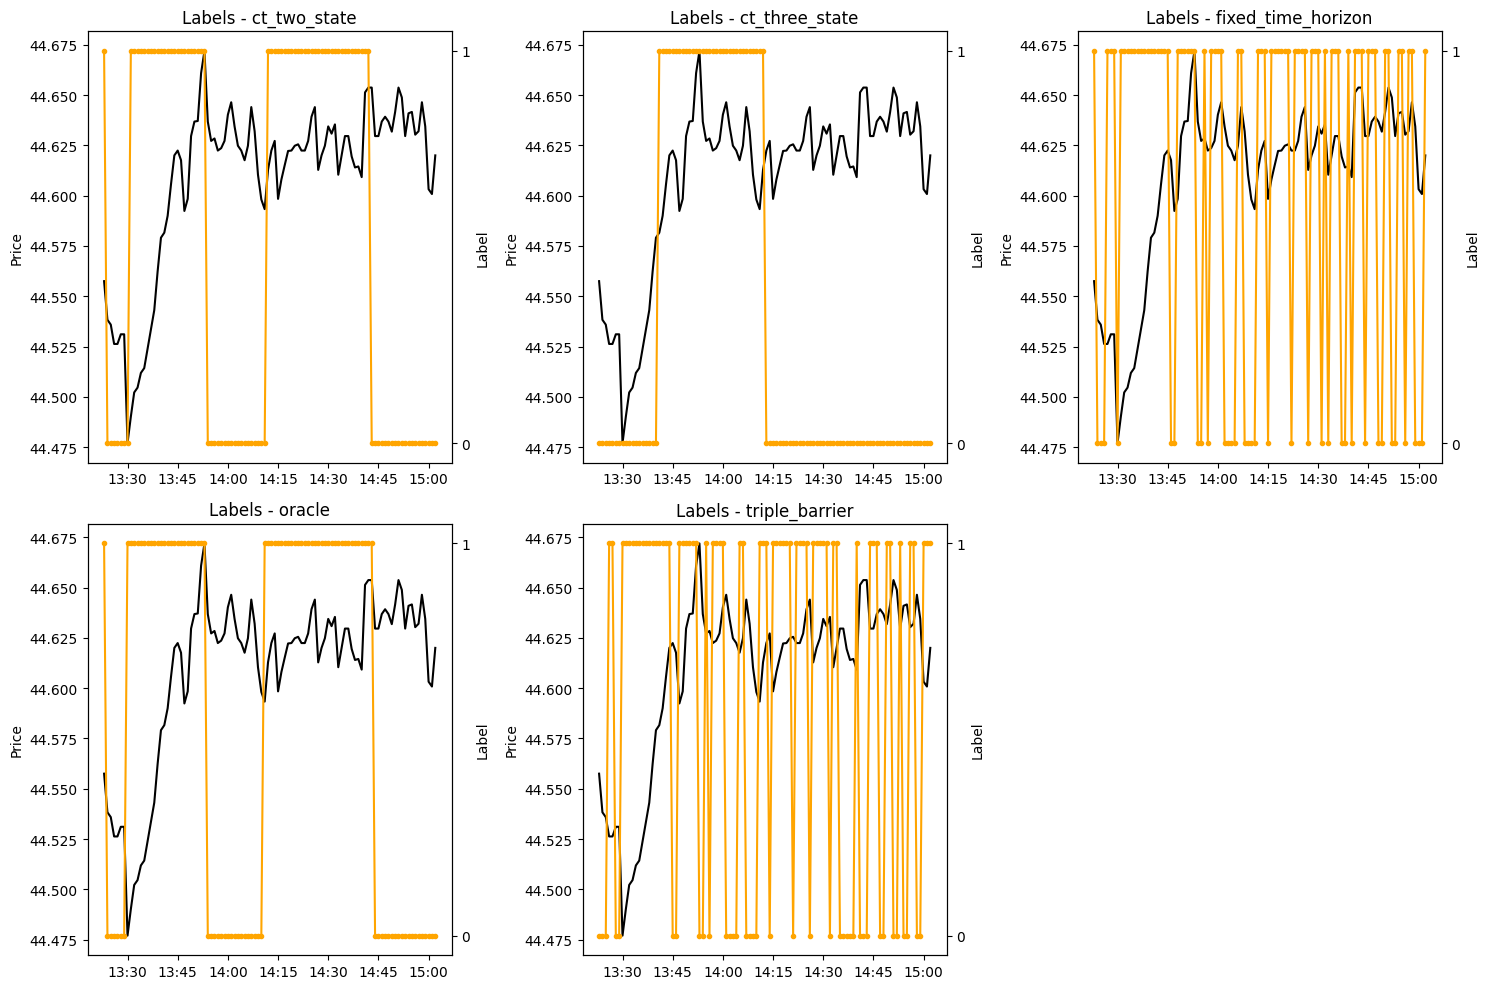

Count of unique values for ct_two_state:
1    25208
0    24325
Name: count, dtype: int64
Count of unique values for ct_three_state:
0    30319
1    19214
Name: count, dtype: int64
Count of unique values for fixed_time_horizon:
Close
1.0    25248
0.0    24285
Name: count, dtype: int64
Count of unique values for oracle:
1.0    28191
0.0    21342
Name: count, dtype: int64
Count of unique values for triple_barrier:
bin
1.0    27446
0.0    22087
Name: count, dtype: int64


In [7]:
start_index = 150
end_index = 250
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels_dict = {}
for label_name in labels_train_dict.keys():
    labels_dict[label_name] = labels_train_dict[label_name][start_index:end_index]

plot_utils.plot_labels('Labels', prices, labels_dict)

for label_key, label_series in labels_test_dict.items():
    print(f"Count of unique values for {label_key}:")
    print(label_series.value_counts())

## Return Distribution

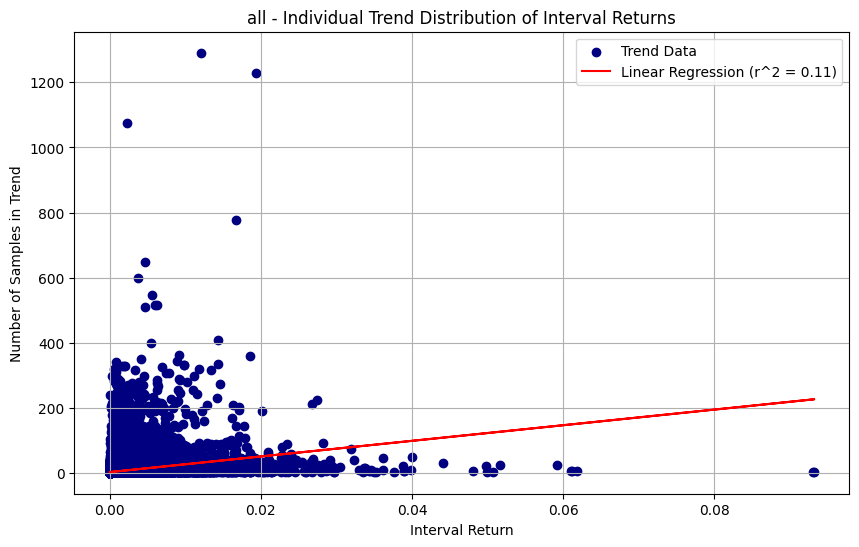

In [4]:
def compute_trend_absolute_returns(prices: pd.Series, labels: pd.Series) -> pd.Series:
    prices = prices[prices.index.isin(labels.index)]
    trend_returns = pd.Series(np.NaN, index=labels.index)
    
    trend_start_i = 0  # Start index of the trend

    for i, label in enumerate(labels.iloc[1:], start=1):
        if label != labels.iloc[trend_start_i] or i == len(labels) - 1:
            # End of the trend interval
            trend_end_i = i - 1 if label != labels.iloc[trend_start_i] else i
            # Calculate the absolute return for the trend interval
            absolute_return = abs(prices.iloc[trend_end_i] / prices.iloc[trend_start_i] - 1)
            for j in range(trend_start_i, trend_end_i + 1):
                trend_returns.iloc[j] = absolute_return
            trend_start_i = i  # Update the start of the new trend
    
    return trend_returns

returns_all_arr = []
for label_name, label_series in labels_train_dict.items():
    returns_s = compute_trend_absolute_returns(feat_train_df['Close'], label_series)
    returns_all_arr.append(returns_s.values)
returns_all_s = pd.Series(np.concatenate(returns_all_arr))
    
plot_utils.plot_4_aggregated_trend_distribution(f'all - Individual Trend Distribution of Interval Returns', returns_all_s)

## Weight Plots

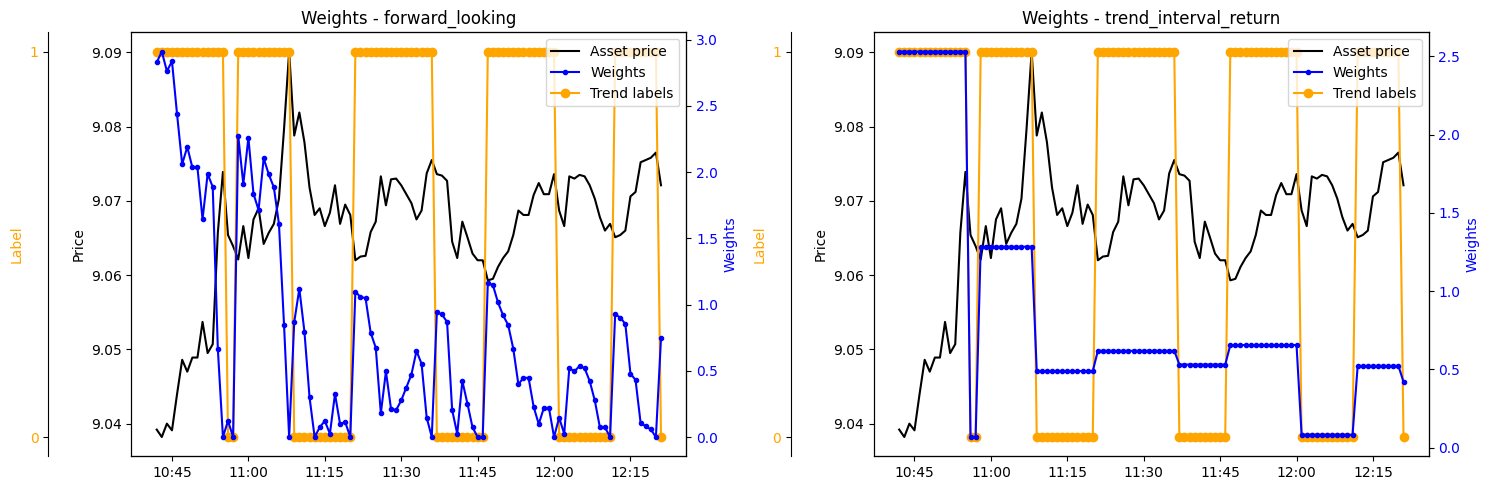

In [3]:
from weights import trend_interval_return
start_index = 150
end_index = 250
prices = raw_train_df['Close'].iloc[start_index:end_index]
labels = labels_train_dict['oracle'].iloc[start_index:end_index]
weights_dict = {}
for weight_alg, weights in weights_train_dict['oracle'].items():
    if weight_alg in ['trend_interval_return', 'forward_looking']:
        weights_dict[weight_alg] = weights.iloc[start_index:end_index]

plot_utils.plot_weights('Weights', prices, labels, weights_dict)


# plot_utils.plot_weights_distribution(weights_train_dict['oracle']['trend_interval_return'])
# plot_utils.plot_weights_distribution(weights_test_dict['oracle']['forward_looking'])

# print(weights_train_dict['oracle']['trend_interval_return'].sum())
# print(weights_train_dict['oracle']['trend_interval_return'].shape)

# plot_utils.plot_4_aggregated_trend_distribution('trend interval return', weights_train_dict['oracle']['trend_interval_return'])
# plot_utils.plot_4_aggregated_trend_distribution('forward looking', weights_train_dict['oracle']['forward_looking'])

## Accuracy - AUC Plots

In [4]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed/metrics.json', 'r') as file:
    metrics = json.load(file)

print('New tests with 150 epochs')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

New tests with 150 epochs
Table for Accuracy:
+--------------------+-----------+------------------------+----------------------------+----------------------+
| Label              |   CB_none | none                   | CB_trend_interval_return   |   CB_forward_looking |
|--------------------+-----------+------------------------+----------------------------+----------------------|
| ct_three_state     |  0.496489 | 0.7224287390708923     | **0.8104089498519897**     |             0.765799 |
| ct_two_state       |  0.490706 | **0.6505576372146606** | 0.5914911031723022         |             0.518381 |
| fixed_time_horizon |  0.665014 | **0.674514651298523**  | 0.584469199180603          |             0.491119 |
| oracle             |  0.629492 | **0.6427096128463745** | 0.571664571762085          |             0.546881 |
+--------------------+-----------+------------------------+----------------------------+----------------------+

Table for AUC:
+--------------------+--------------------

In [12]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/detailed-repeated/metrics.json', 'r') as file:
    metrics = json.load(file)

print('New tests with 300 epochs')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

New tests with 300 epochs
Table for Accuracy:
+--------------------+------------------------+------------------------+----------------------------+----------------------+
| Label              | CB_none                | none                   |   CB_trend_interval_return |   CB_forward_looking |
|--------------------+------------------------+------------------------+----------------------------+----------------------|
| ct_three_state     | 0.4964890480041504     | **0.836844265460968**  |                   0.793061 |             0.747212 |
| ct_two_state       | 0.49070632457733154    | **0.6650144457817078** |                   0.603057 |             0.626188 |
| fixed_time_horizon | **0.6757538318634033** | nan                    |                   0.591491 |           nan        |
| oracle             | **0.6303180456161499** | nan                    |                   0.57786  |           nan        |
+--------------------+------------------------+------------------------+-------

In [7]:
# Print table with results
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/intraday_feat/metrics.json', 'r') as file:
    metrics = json.load(file)

print('Old tests with 300 epochs and each test have class balance')
plot_utils.print_highlighted_LW_table(metrics, 'Accuracy', 'accuracy', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'AUC', 'auc', 'best_model_test')
plot_utils.print_highlighted_LW_table(metrics, 'Cumulative Return', 'cumulative_return', 'best_model_test')

Old tests with 300 epochs and each test have class balance
Table for Accuracy:
+--------------------+----------+-------------------------+------------------------+
| Label              |     none | trend_interval_return   | forward_looking        |
|--------------------+----------+-------------------------+------------------------|
| ct_three_state     | 0.342007 | **0.8709291219711304**  | 0.8634217977523804     |
| ct_two_state       | 0.606691 | **0.7510547041893005**  | 0.3933960199356079     |
| fixed_time_horizon | 0.653532 | **0.740211009979248**   | 0.4321296513080597     |
| oracle             | 0.647212 | **0.735615611076355**   | 0.725385844707489      |
| triple_barrier     | 0.527881 | 0.6671485304832458      | **0.6672473549842834** |
+--------------------+----------+-------------------------+------------------------+

Table for AUC:
+--------------------+----------+-------------------------+-------------------+
| Label              |     none | trend_interval_return   | 

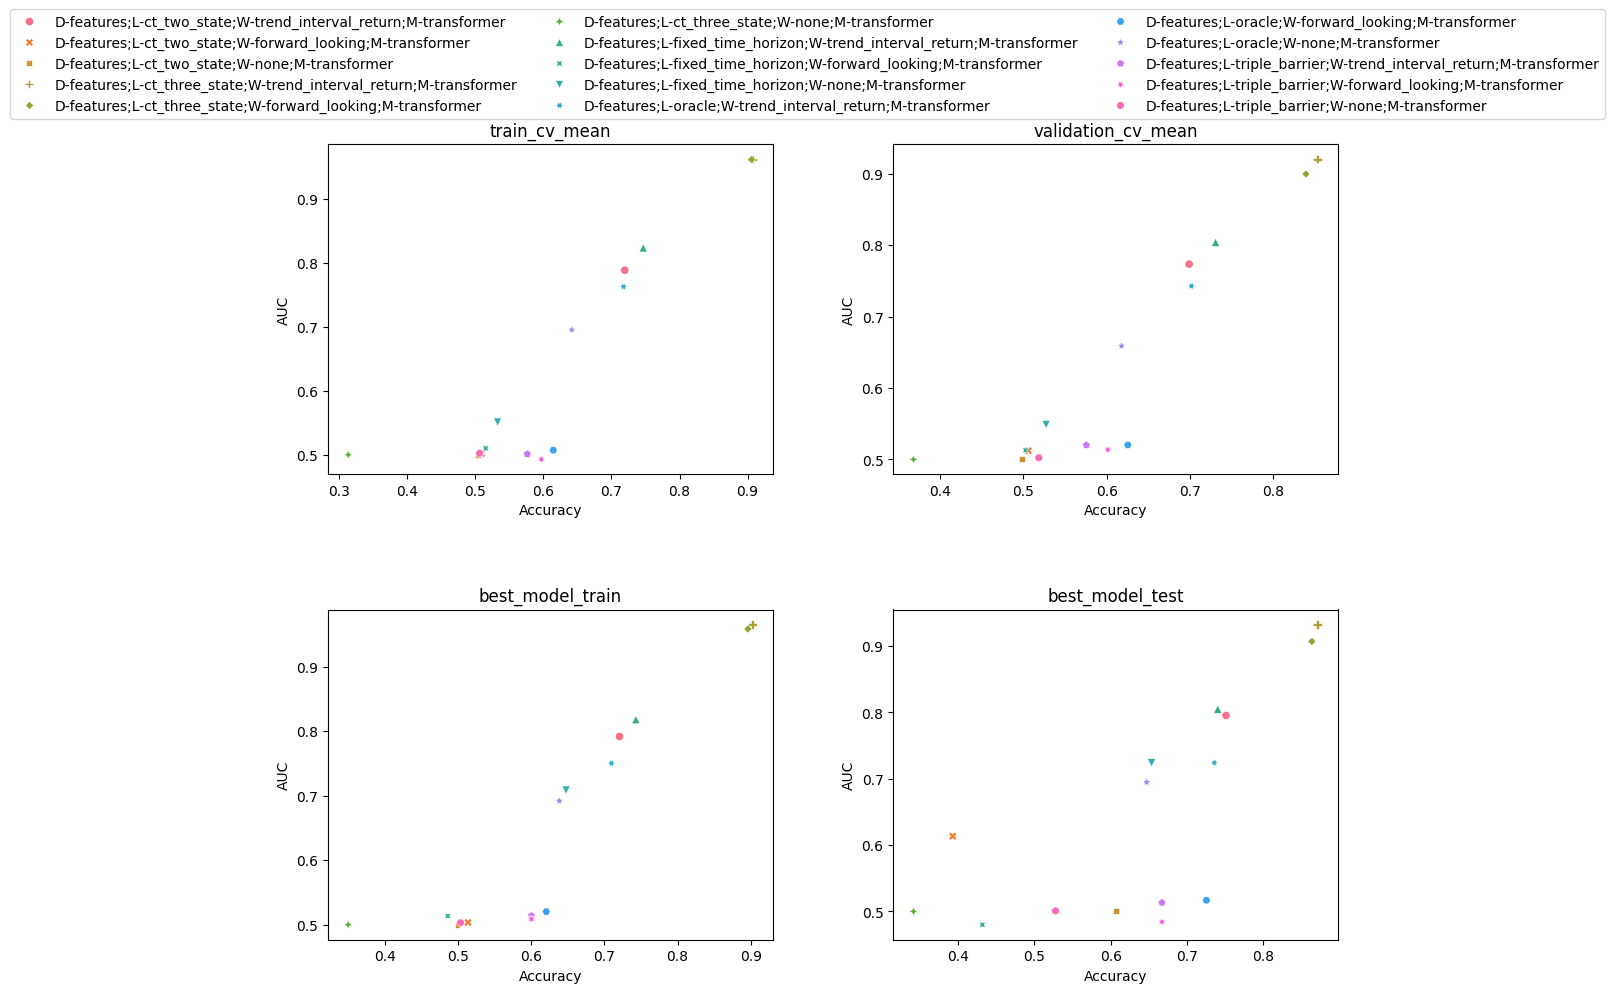

DataFrame for best_model_train:
+----------+------------+----------+-------------+--------------------+-----------------------+
|      AUC |   Accuracy | Data     | Model       | Label              | Weight                |
|----------+------------+----------+-------------+--------------------+-----------------------|
| 0.965336 |   0.90218  | features | transformer | ct_three_state     | trend_interval_return |
| 0.958436 |   0.895971 | features | transformer | ct_three_state     | forward_looking       |
| 0.817916 |   0.742923 | features | transformer | fixed_time_horizon | trend_interval_return |
| 0.791743 |   0.720552 | features | transformer | ct_two_state       | trend_interval_return |
| 0.750303 |   0.709752 | features | transformer | oracle             | trend_interval_return |
| 0.708648 |   0.647536 | features | transformer | fixed_time_horizon | none                  |
| 0.691912 |   0.638302 | features | transformer | oracle             | none                  |
| 0.5203

In [4]:
with open('/home/mdzaja/MasterThesis/tmp-combined.json', 'r') as file:
    metrics = json.load(file)
data_types = ['train_cv_mean', 'validation_cv_mean', 'best_model_train', 'best_model_test']
plot_utils.plot_acc_auc(metrics, x_title='Accuracy', y_title='AUC', x_key='accuracy', y_key='auc', data_types=data_types)

## ROC AUC Curve Plots

In [7]:
model1 = load_model("/home/mdzaja/MasterThesis/artifacts/models/test_logs/oracle-transformer/saved_models/raw-oracle-none-transformer.keras")
model2 = load_model("/home/mdzaja/MasterThesis/artifacts/models/test_logs/oracle-transformer/saved_models/raw-oracle-trend_interval_return-transformer.keras")

y_prob_dict = {
    'raw-oracle-none-transformer': {
        'label_name': 'oracle',
        'probs': model1.predict(raw_train_X).flatten(),
    },
    'raw-oracle-trend_interval_return-transformer': {
        'label_name': 'oracle',
        'probs': model2.predict(raw_train_X).flatten(),
    }
}
plot_utils.plot_roc_auc_curves(Y_train_dict, y_prob_dict, 'ROC AUC curves - train')

y_prob_dict = {
    'raw-oracle-none-transformer': {
        'label_name': 'oracle',
        'probs': model1.predict(raw_test_X).flatten(),
    },
    'raw-oracle-trend_interval_return-transformer': {
        'label_name': 'oracle',
        'probs': model2.predict(raw_test_X).flatten(),
    }
}
plot_utils.plot_roc_auc_curves(Y_test_dict, y_prob_dict, 'ROC AUC curves - test')

2024-01-12 16:40:10.995056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:40:10.995567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-12 16:40:11.006956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

ValueError: in user code:

    File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/engine/training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/engine/training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/engine/training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/engine/training.py", line 2357, in predict_step
        return self(x, training=False)
    File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filedo1393z_.py", line 24, in tf__call
        ag__.for_stmt(ag__.ld(self).transformer_blocks, None, loop_body, get_state, set_state, ('x',), {'iterate_names': 'transformer_block'})
    File "/tmp/__autograph_generated_filedo1393z_.py", line 22, in loop_body
        x = ag__.converted_call(ag__.ld(transformer_block), (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer 'custom_transformer' (type CustomTransformer).
    
    in user code:
    
        File "/home/mdzaja/MasterThesis/models/transformer.py", line 77, in call  *
            x = transformer_block(x)
        File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/home/mdzaja/installations/miniconda3/envs/mt/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
            raise ValueError(
    
        ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 60, 11), found shape=(None, 60, 5)
    
    
    Call arguments received by layer 'custom_transformer' (type CustomTransformer):
      • inputs=tf.Tensor(shape=(None, 60, 5), dtype=float32)


## Backtest Results

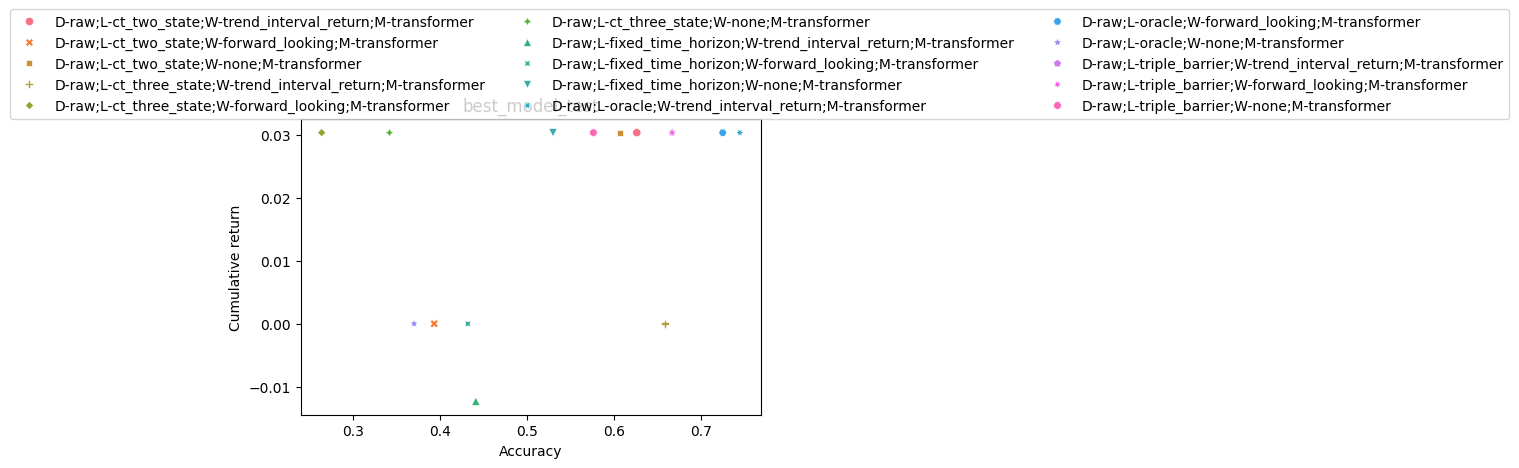

DataFrame for best_model_train:
+---------------------+------------+--------+---------+---------+----------+
| Cumulative return   | Accuracy   | Data   | Model   | Label   | Weight   |
|---------------------+------------+--------+---------+---------+----------|
+---------------------+------------+--------+---------+---------+----------+
DataFrame for best_model_test:
+---------------------+------------+--------+-------------+--------------------+-----------------------+
|   Cumulative return |   Accuracy | Data   | Model       | Label              | Weight                |
|---------------------+------------+--------+-------------+--------------------+-----------------------|
|           0.0303523 |   0.745088 | raw    | transformer | oracle             | trend_interval_return |
|           0.0303523 |   0.725386 | raw    | transformer | oracle             | forward_looking       |
|           0.0303523 |   0.667247 | raw    | transformer | triple_barrier     | forward_looking       |

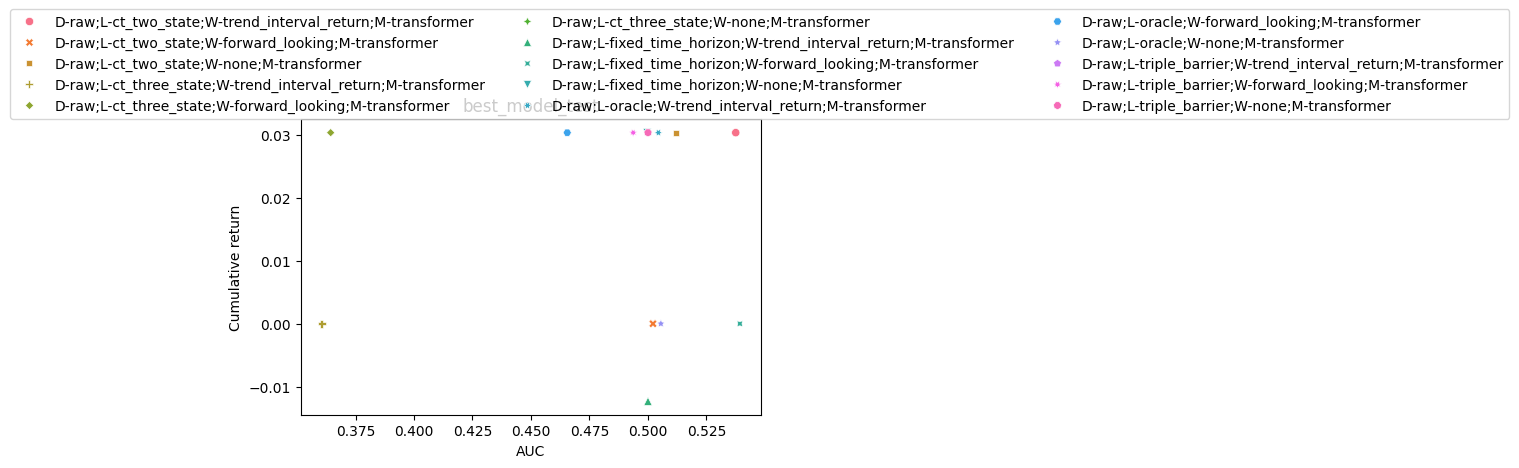

DataFrame for best_model_train:
+---------------------+-------+--------+---------+---------+----------+
| Cumulative return   | AUC   | Data   | Model   | Label   | Weight   |
|---------------------+-------+--------+---------+---------+----------|
+---------------------+-------+--------+---------+---------+----------+
DataFrame for best_model_test:
+---------------------+----------+--------+-------------+--------------------+-----------------------+
|   Cumulative return |      AUC | Data   | Model       | Label              | Weight                |
|---------------------+----------+--------+-------------+--------------------+-----------------------|
|           0.0303523 | 0.537503 | raw    | transformer | ct_two_state       | trend_interval_return |
|           0.0303523 | 0.511971 | raw    | transformer | ct_two_state       | none                  |
|           0.0303523 | 0.504437 | raw    | transformer | oracle             | trend_interval_return |
|           0.0303523 | 0.5    

In [11]:
with open('/home/mdzaja/MasterThesis/artifacts/assets/AAPL/models/test_logs/intraday_raw/metrics.json', 'r') as file:
    metrics = json.load(file)
data_types = ['best_model_test']
plot_utils.plot_acc_auc(metrics, x_title='Accuracy', y_title='Cumulative return', x_key='accuracy', y_key='cumulative_return', data_types=data_types)
plot_utils.plot_acc_auc(metrics, x_title='AUC', y_title='Cumulative return', x_key='auc', y_key='cumulative_return', data_types=data_types)